In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("car_evaluation.csv",header=None)

In [3]:
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
df.shape

(1728, 7)

In [5]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
#REname column names:
# we can see that the does not have proper column names. the column are merely labelled as 0,1,2,3 and so on. we should give proper 
# names to the columns. i will do it follows.

In [7]:
col_names=['buying','maint','doors','persons','lug_boot','safety','class']
df.columns=col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [8]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


#we can see that the columns names are renamed. now, the columns have meaningful.

# view summery of data set

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


# frequency distribution of values in variables

Now i will check the frequency counts of categorical variables 

In [11]:
col_names=['buying','maint','doors','persons','lug_boot','safety','class']
for col in col_names:
    print(df[col].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


we can see that the doors and persons are categorical in nature. so , i will treat them as categorical variables. 

# summery of variables

. there are 7 variables in the dataset all the variables are of categorical data type.
. These are given by buying ,maint, doors, persons,lug_boot,saftey, and class
. class is the target variable

# Explore class variable

In [12]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

# Missing values

In [13]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

# declare feature vector and target variable

In [14]:
x=df.drop(['class'],axis=1)
y=df['class']

x is independent features and 
y is dependent features

# split data into separete trainig and test set

In [15]:
#split x and y into traing and testingsets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x , y, test_size=0.33,random_state=42)

In [16]:
# check the shape of x_train and x_test
x_train.shape


(1157, 6)

In [17]:
x_test.shape

(571, 6)

# feture Engineering

Feature Engineering is the process of transforming raw data into usefull features that helps us to understand our model better
and increase its predictive power. i will carry out feature engineering on differnt types of variables.


first , i will check the data types of variables again.

In [18]:
#check data types in x_train
x_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

# Encode categorical variables

Now, i will encode the categorical variables

In [19]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


we can see that all the variables are ordinal data type.

In [20]:
#import categorical encoders
import category_encoders as ce

In [21]:
#encode variable with ordinal encoding
encoder= ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
x_train=encoder.fit_transform(x_train)
x_test=encoder.fit_transform(x_test)

In [22]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [23]:
x_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,1,1,1,1,1,1
1201,2,2,2,2,1,2
628,1,1,3,1,2,2
1498,3,1,3,2,1,2
1263,2,2,1,3,1,3


# Decision Tree Classifier with criterion gini index

In [24]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [25]:
#instantiate the DecisionTreeClassifier model with criterion gini index 
clf_gini= DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)

# fit the model
clf_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

# predict the test set results with criterion gini index

In [26]:
y_pred_gini= clf_gini.predict(x_test)

# check accuracy score with criterion gini index

In [27]:
from sklearn.metrics import accuracy_score
print('model accuracy score with criterion gini index:{0:0.4f}'.format(accuracy_score(y_test,y_pred_gini)))

model accuracy score with criterion gini index:0.5271


# DecisionTreeClassifier.score(y_test,y_pred_gini)

here y_test are the true class labels and y_pred_gini are the predicted class labels in the test-set

# compare the train-set and test-set accuracy

now, i will compare the train-set and test-set accuracy to check for overfitting

In [28]:
y_pred_train_gini= clf_gini.predict(x_train)
y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [29]:
print('trainig-set accuracy score:{0:0.4f}'.format(accuracy_score(y_train,y_pred_train_gini)))

trainig-set accuracy score:0.7865


# Check for overfitting and underfitting

In [30]:
#print the score on trainig and test set
print('Training set score:{:.4f}'.format(clf_gini.score(x_train,y_train)))
print('test set score :{:.4f}'.format(clf_gini.score(x_test,y_test)))

Training set score:0.7865
test set score :0.5271


Here, the training -set accuracy score is 0.7865 while the test set accuracy to be 0.5271. these two values are quite comparable
so, these is no sign of overfitting.

# Visualize decision tree

[Text(0.4, 0.875, 'X[5] <= 1.5\ngini = 0.455\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(0.6, 0.625, 'X[3] <= 2.5\ngini = 0.577\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(0.4, 0.375, 'X[0] <= 2.5\ngini = 0.631\nsamples = 525\nvalue = [255, 49, 181, 40]'),
 Text(0.2, 0.125, 'gini = 0.496\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(0.6, 0.125, 'gini = 0.654\nsamples = 254\nvalue = [131, 49, 34, 40]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 246\nvalue = [0, 0, 246, 0]')]

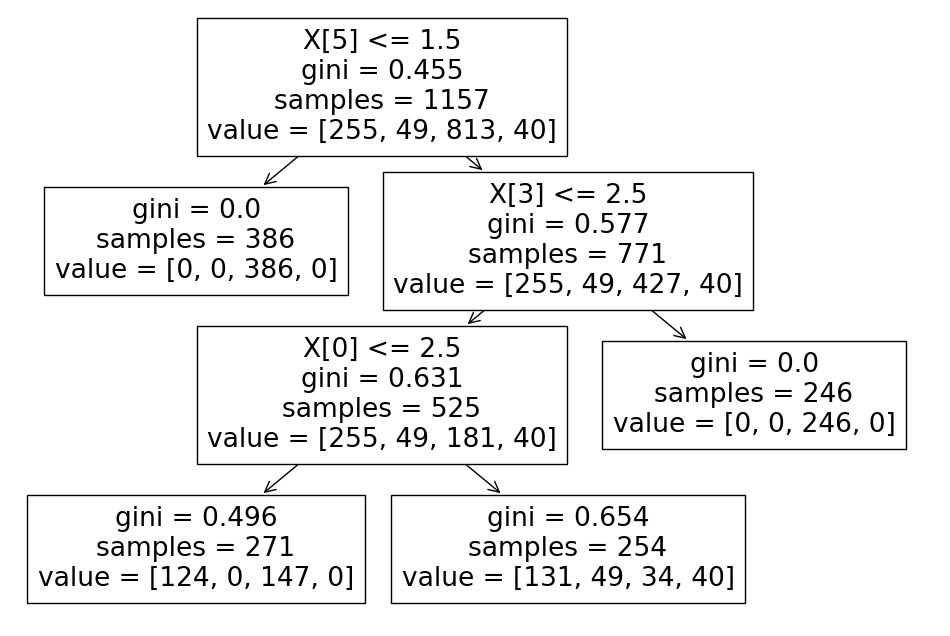

In [31]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(x_train,y_train))

In [32]:
conda install python-graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\anaconda

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1u             |       h2bbff1b_0         5.5 MB
    ------------------------------------------------------------
                                           Total:         5.5 MB

The following packages will be UPDATED:

  openssl                                 1.1.1t-h2bbff1b_0 --> 1.1.1u-h2bbff1b_0 None




openssl-1.1.1u       | 5.5 MB    |            |   0% 
openssl-1.1.1u       | 5.5 MB    |            |   0% 
openssl-1.1.1u       | 5.5 MB    |            |   1% 
openssl-1.1.1u       | 5.5 MB    | 3          |   4% 
openssl-1.1.1u       | 5.5 MB    | 5          |   5% 
openssl-1.1.1u       | 5.5 MB    | 7          |   8% 
openssl-1.1.1u       | 5.5 MB    | 9          |  10% 
ope



==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda




# Visualize decision tree with graphviz

In [33]:
import graphviz

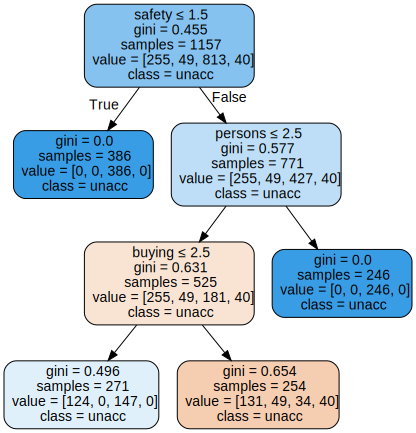

In [34]:
dot_data=tree.export_graphviz(clf_gini, out_file=None,
                             feature_names=x_train.columns,
                             class_names=y_train,
                             filled=True, rounded=True,
                             special_characters=True)

graph=graphviz.Source(dot_data)
graph

# Decision Tree Classifier with criterion entropy

In [35]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)

#fit the model
clf_en.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# predict the test set results with criterion entropy

In [36]:
y_pred_en= clf_en.predict(x_test)

# check accuracy score with criterion entropy

In [37]:
from sklearn.metrics import accuracy_score
print('model accuracy score with criterion entropy:{0:0.4f}'.format(accuracy_score(y_test,y_pred_en)))

model accuracy score with criterion entropy:0.5271


# compare the train-set and test set accuracy

now, i will compare the train set and test set accuracy to check for overfitting.

In [38]:
y_pred_train_en = clf_en.predict(x_train)
y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [39]:
print('Training-set accuracy score:{0:0.4f}'.format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score:0.7865


# check for overfitting and underfitting

In [40]:
#print the score on training and test set
print('Training test-set score:{:4f}'.format(clf_en.score(x_train,y_train)))
print('Test set score :{:4f}'.format(clf_en.score(x_test, y_test)))

Training test-set score:0.786517
Test set score :0.527145


we can see that the training set score and test set score is same as above . the training set accuracy score is 0.7865 while the test set accuracy 0.527145. these two values are quite comparable . so , there is no sign of overfitting

# Visualize decion trees

[Text(0.4, 0.875, 'X[5] <= 1.5\nentropy = 1.2\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(0.6, 0.625, 'X[3] <= 2.5\nentropy = 1.474\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(0.4, 0.375, 'X[0] <= 2.5\nentropy = 1.638\nsamples = 525\nvalue = [255, 49, 181, 40]'),
 Text(0.2, 0.125, 'entropy = 0.995\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(0.6, 0.125, 'entropy = 1.759\nsamples = 254\nvalue = [131, 49, 34, 40]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 246\nvalue = [0, 0, 246, 0]')]

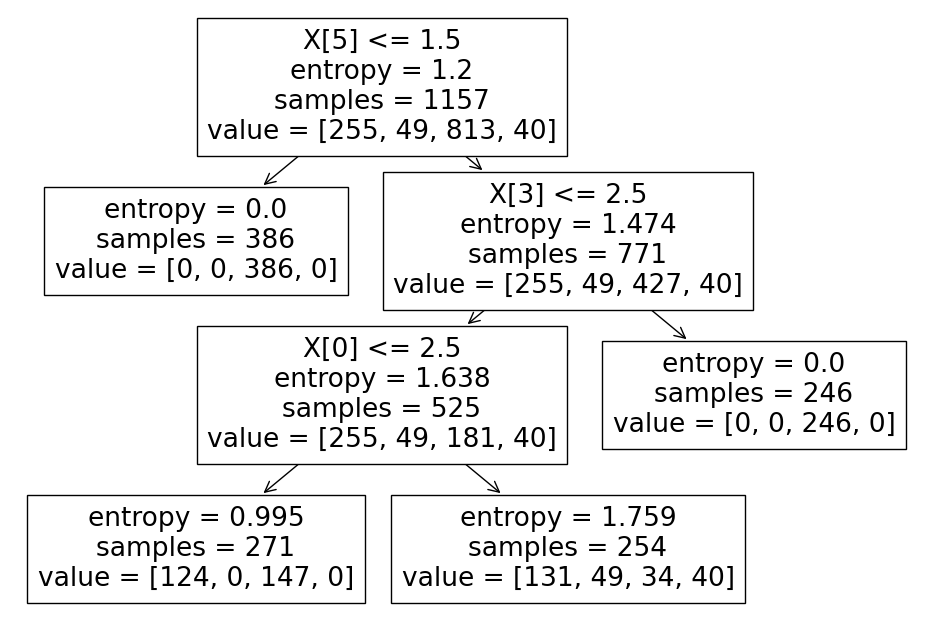

In [41]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(x_train,y_train))

# Visualize decision tree with graphviz

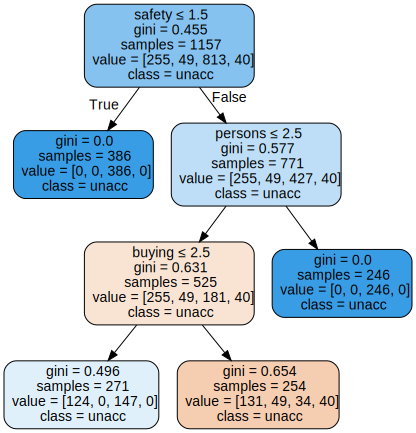

In [42]:
import graphviz
dot_data=tree.export_graphviz(clf_gini, out_file=None,
                             feature_names=x_train.columns,
                             class_names=y_train,
                             filled=True, rounded=True,
                             special_characters=True)
graph=graphviz.Source(dot_data)
graph

Now based on the above analysis we can conclude that our classifiation model accuracy is very good. Our model is doing a very good .
our model is doing a very good job in terms of predicting the class labels.
but, it does not gives the underlying distribution of values . also it does not tell anything about the type of errors our classifier
is making. we have another tool called Confusion_matrix that comes to our rescue

In [43]:
# Print the confusion Matrix and slice it into four pices
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_en)
print('Confusion matrix\n\n',cm)

Confusion matrix

 [[ 19   0 110   0]
 [  3   0  17   0]
 [115   0 282   0]
 [  0   0  25   0]]


# Classification Report

Classification report is another way to evalute the classification model performance. it displays the precision, recall, f1 and 
support score for the model . i have described these terms in later.


we can print a classification report as follows

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_en))

              precision    recall  f1-score   support

         acc       0.14      0.15      0.14       129
        good       0.00      0.00      0.00        20
       unacc       0.65      0.71      0.68       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.53       571
   macro avg       0.20      0.21      0.21       571
weighted avg       0.48      0.53      0.50       571



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# RESULTS AND CONCLUSION

1. In this Project. i build a Decision-Tree Classifier model to predict the safety of the car. build two models, one with criterion gini index and another one with criterion entropy. the model yeilds a very good performance as indicated by the model accuracy in both the casess which was found to be 0.527145.
2. In the model with criterion gini index , the training-set accuracy score is 0.786517 while the test-set accuracy to be 0.527145. these two values are quite comparable. so there is no sign of overfitting.
3. Smiliarly , in the model with criterion entropy , the training set accuracy score is 0.7865 while the test-set accuracy to be 0.527145. we get the same values as in the case with criterion gini. so there is no sign of overfitting.
4. In both the cases , the training set and test-set accuracy score is the same. it may happen because of small dataset.
5. The confusion matrix and classification report yeilds very good model performance.